In [1]:
from imgSimSearch import *

In [2]:
# Main execution flow
model = FeatureExtractor()
model.eval()  # Set model to evaluation mode (disables dropout and batch norm)

FeatureExtractor(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)


In [3]:


embeddings = compute_embeddings(image_dir, model)  # Compute embeddings for all images
save_embeddings_hdf5(embeddings)  # Save computed embeddings


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: profile 'ICC Profile': 'desc': ICC profile tag start not a multiple of 4
libpng warning: iCCP: profile 'ICC Profile': 'wtpt': ICC profile tag start not a multiple o

In [4]:
loaded_embeddings = load_embeddings_hdf5()  # Load saved embeddings
similarities = compare_new_image(new_image_path, loaded_embeddings, model)  # Compare new image
print(similarities)  # Print the similarities

{'n01440764_tench.png': 0.99999994, 'n01443537_goldfish.png': 0.32998025, 'n01484850_great_white_shark.png': 0.12285275, 'n01491361_tiger_shark.png': 0.2176732, 'n01494475_hammerhead.png': 0.05535446, 'n01496331_electric_ray.png': 0.09514695, 'n01498041_stingray.png': 0.15297346, 'n01514668_cock.png': 0.09216328, 'n01514859_hen.png': 0.05440391, 'n01518878_ostrich.png': 0.09150325, 'n01530575_brambling.png': 0.16927397, 'n01531178_goldfinch.png': 0.18857405, 'n01532829_house_finch.png': 0.12855422, 'n01534433_junco.png': 0.13509849, 'n01537544_indigo_bunting.png': 0.038443897, 'n01558993_robin.png': 0.13857228, 'n01560419_bulbul.png': 0.11095095, 'n01580077_jay.png': 0.1056686, 'n01582220_magpie.png': 0.10925422, 'n01592084_chickadee.png': 0.09010158, 'n01601694_water_ouzel.png': 0.12876596, 'n01608432_kite.png': 0.08382477, 'n01614925_bald_eagle.png': 0.21613374, 'n01616318_vulture.png': 0.06326544, 'n01622779_great_grey_owl.png': 0.11471148, 'n01629819_European_fire_salamander.png': 

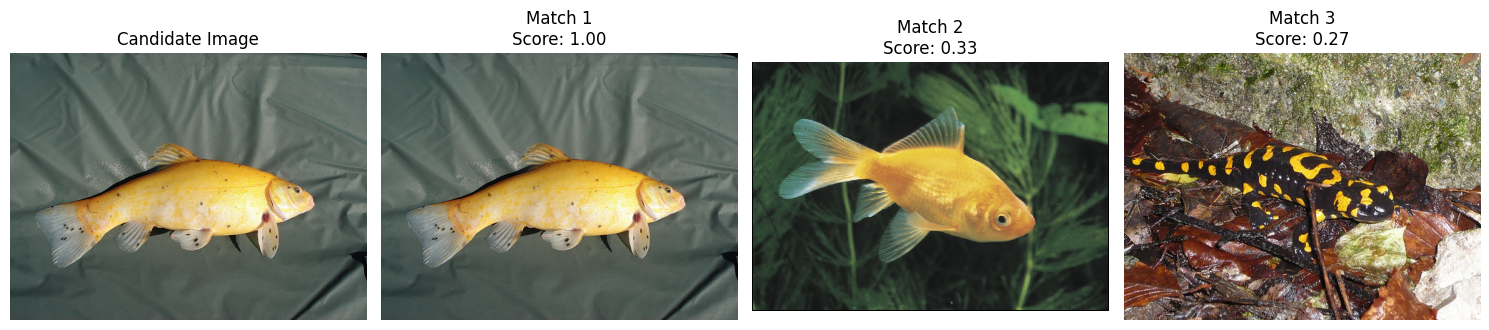

In [5]:
import matplotlib.pyplot as plt
from PIL import Image

def show_similar_images(candidate_path, similarities, image_dir, top_n=3):
    """Display the candidate image and its top N most similar images."""
    # Load the candidate image
    candidate_image = Image.open(candidate_path)
    
    # Get the top N similar images sorted by similarity score
    sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:top_n]
    
    # Create a subplot for the candidate image and the top N similar images
    fig, axs = plt.subplots(1, top_n + 1, figsize=(15, 10))  # Adjust size as needed
    
    # Display the candidate image
    axs[0].imshow(candidate_image)
    axs[0].set_title("Candidate Image")
    axs[0].axis('off')
    
    # Display the top N similar images
    for i, (img_name, sim_score) in enumerate(sorted_similarities, start=1):
        img_path = os.path.join(image_dir, img_name)
        image = Image.open(img_path)
        axs[i].imshow(image)
        axs[i].set_title(f"Match {i}\nScore: {sim_score:.2f}")
        axs[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Assuming `similarities` and `new_image_path` are available from previous computations
show_similar_images(new_image_path, similarities, image_dir)
